# Project 1 : Title

Description of the project

In [4]:
from __future__ import print_function, division

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
import datetime

#### Data Download

Download and read 3 months of MTA turnstile data files.


In [7]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "data/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [180505,
180512,
180519,
180526,
180602,
180609,
180616,
180623,
180630,
180707,
180714,
180721,
180728,
180804,
180811,
180818,
180825]
turnstiles_df = get_data(week_nums)

In [32]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,FOUR_HOURS_INTERVAL,PREV_DATE_TIME,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829,2018-04-28 00:00:00,False,NaT,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830,2018-04-28 04:00:00,True,2018-04-28 00:00:00,6598847.0,2235829.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863,2018-04-28 08:00:00,True,2018-04-28 04:00:00,6598864.0,2235830.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955,2018-04-28 12:00:00,True,2018-04-28 08:00:00,6598880.0,2235863.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015,2018-04-28 16:00:00,True,2018-04-28 12:00:00,6598961.0,2235955.0


In [9]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [10]:
#  Deleting spaces from the column lables
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [11]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [12]:
# Three months of Data
#This is to make sure we have 3 months worth of data
# turnstiles_df.DATE.value_counts().sort_index()

Let's turn this into a time series. Create a new column that stores the date and time as a single pandas datetime object.

In [13]:
from datetime import datetime as dt

In [14]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [15]:
turnstiles_df = turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])

In [16]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [17]:
# turnstiles_df.DESC.value_counts()

In [18]:
# turnstiles_df[turnstiles_df.DESC=="RECOVR AUD"]

In [19]:
# mask = ((turnstiles_df["C/A"] == "A022") & 
# (turnstiles_df["UNIT"] == "R022") & 
# (turnstiles_df["SCP"] == "01-00-00") )
# turnstiles_df[mask].head(100)

In [20]:
# turnstiles_df['TIME'].value_counts()

In [33]:
# turnstiles_df["DATE_TIME"].transform(lambda t: t.hour).value_counts()

**We Create an indicator to flag turnstile that have exactly 4 hours difference with the previous one. Otherwise we can't compare the turnsiles!!**

In [21]:
turnstiles_df = turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],ascending=True)
turnstiles_df["FOUR_HOURS_INTERVAL"] = (turnstiles_df["DATE_TIME"].diff()=="04:00:00")

In [27]:
#checking individual counts
# turnstiles_df.ENTRIES.diff()[turnstiles_df.FOUR_HOURS_INTERVAL].describe()

In [34]:
turnstiles_df[["PREV_DATE_TIME", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_df
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES", "EXITS"]
                                                       .transform(lambda grp: grp.shift(1)))

In [35]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,FOUR_HOURS_INTERVAL,PREV_DATE_TIME,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829,2018-04-28 00:00:00,False,NaT,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830,2018-04-28 04:00:00,True,2018-04-28 00:00:00,6598847.0,2235829.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863,2018-04-28 08:00:00,True,2018-04-28 04:00:00,6598864.0,2235830.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955,2018-04-28 12:00:00,True,2018-04-28 08:00:00,6598880.0,2235863.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015,2018-04-28 16:00:00,True,2018-04-28 12:00:00,6598961.0,2235955.0


In [36]:
# Drop the rows for the earliest date in the df
turnstiles_df.dropna(subset=["PREV_DATE_TIME"], axis=0, inplace=True)

In [ ]:
def get_hourly_interval_counts(row, max_counter, column):
    counter = row[column] - row["PREV_"+column]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row[column], row["PREV_"+column])
        counter = min(row[column], row["PREV_"+column])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_df["INTERVAL_ENTRIES"] = turnstiles_df.apply(get_hourly_interval_counts, axis=1, max_counter=1000000, column="ENTRIES")
turnstiles_df["INTERVAL_EXITS"] = turnstiles_df.apply(get_hourly_interval_counts, axis=1, max_counter=1000000, column="EXITS")

488 2997549.0
114 29163426.0
524296 1535945.0
7 1646681283.0
39 4111454.0
552547867 2106.0
338 1813703.0
3584210 16809292.0
433 5074202.0
50386730 254800.0
122 50386730.0
245 7117903.0
458763 4365358.0
16824342 102581.0
134 1949067.0
174 3956142.0
353 4451954.0
319 2944492.0
52 1071940.0
62 2411616.0
1442830408 11142660.0
7 4709092.0
10 2479313.0
1114281 6565.0
348 20220123.0
107 11178676.0
18 2776359.0
1208002150 4781477.0
3794852 812861.0
12 3794871.0
54 1149724.0
17 1320446.0
33604922 145092.0
33602414 158393.0
169 1685045.0
0 1122816.0
218572142 118342934.0
1493118270 10963364.0
44507993 1493040918.0
704645171 2783736.0
16 5890270.0
1282912405 239.0
10 1282912405.0
137 1787704.0
30 1580082.0
2067430671 910999.0
2067447699 2242569.0
1349914 2067431093.0
5105581 1349335.0
8781866 4718825.0
119 7015818.0
458761 151252604.0
44 9652856.0
621072165 2252127.0
2252257 621072165.0
0 50331648.0
74 871938174.0
44 4648569.0
458759 67192668.0
44 1752712.0
117444532 136656341.0
65 1066413.0
1067

In [73]:
turnstiles_df.ENTRIES.diff()[turnstiles_df.VALID_EXITS].describe()

count    5.019660e+05
mean     3.096552e+03
std      2.020868e+06
min     -1.087514e+07
25%      5.500000e+01
50%      1.860000e+02
75%      4.130000e+02
max      1.431688e+09
Name: ENTRIES, dtype: float64

**We have to deal with negative and extreme values!**

Strategy : Flag as non valid for now (maximum value = 10 K)

In [74]:
turnstiles_df.VALID_ENTRIES=(turnstiles_df.VALID_ENTRIES) & (turnstiles_df.ENTRIES.diff()>0) & (turnstiles_df.ENTRIES.diff()< 10000)
turnstiles_df.VALID_EXITS=(turnstiles_df.VALID_EXITS) & (turnstiles_df.EXITS.diff()>0) & (turnstiles_df.EXITS.diff()< 10000)

In [75]:
turnstiles_df.ENTRIES.diff()[turnstiles_df.VALID_ENTRIES].describe()

count    431190.000000
mean        262.246061
std         259.463956
min           1.000000
25%          83.000000
50%         184.000000
75%         358.000000
max        3184.000000
Name: ENTRIES, dtype: float64

In [76]:
turnstiles_df.ENTRIES.diff()[turnstiles_df.VALID_EXITS].describe()

count    433784.000000
mean        338.018781
std         619.775162
min     -327686.000000
25%         103.000000
50%         228.000000
75%         460.000000
max        3506.000000
Name: ENTRIES, dtype: float64

This worked! Let's create the count variable for valid entries and exits.

In [77]:
turnstiles_df["INTERVAL_ENTRIES"]=turnstiles_df.ENTRIES.diff()
turnstiles_df["INTERVAL_EXITS"]=turnstiles_df.EXITS.diff()

In [78]:
# turnstiles_df.DESC[turnstiles_df.VALID_ENTRIES].value_counts()

In [79]:
# turnstiles_df.DESC[turnstiles_df.VALID_EXITS].value_counts()

In [80]:
# turnstiles_df['INTERVAL_ENTRIES'].shift(-1).head()

**Now, we have to deal with specific stations --> EXPLAIN HERE**

In [1]:
turnstiles_df[turnstiles_df.DIVISION=="PTH"]["STATION"].unique()

NameError: name 'turnstiles_df' is not defined

In [82]:
newList = ['NEWARK HW BMEBE', 'HARRISON', 'JOURNAL SQUARE', 'GROVE STREET', 'EXCHANGE PLACE', 'PAVONIA/NEWPORT', 'CITY / BUS', 'LACKAWANNA', 'NEWARK BM BW',
       'NEWARK C', 'NEWARK HM HE']
# We just drop the correspondant rows from the dataframe
new_turnstiles_df = turnstiles_df[~turnstiles_df['STATION'].isin(newList)]

In [83]:
#Check
new_turnstiles_df[new_turnstiles_df.DIVISION=="PTH"]["STATION"].unique()

array(['CHRISTOPHER ST', '9TH STREET', '14TH STREET', 'TWENTY THIRD ST',
       'THIRTY ST', 'THIRTY THIRD ST', 'PATH WTC 2', 'PATH NEW WTC'],
      dtype=object)

In [84]:
# new_turnstiles_df.loc[new_turnstile_df.INTERVAL_ENTRIES==3006]

**Now, let's agregate the results by station!**

In [85]:
# new_turnstiles_df[new_turnstiles_df.VALID_ENTRIES].groupby(["C/A", "UNIT", "SCP",'STATION','DATE']).agg('count')


In [86]:
# first get the sum of entries in the AM slot by station every day
stations_Interval_Entries = \
(new_turnstiles_df[new_turnstiles_df.VALID_ENTRIES].groupby(['STATION','DATE'])['INTERVAL_ENTRIES'].sum()
                 .reset_index()).sort_values(by="INTERVAL_ENTRIES", ascending=False)  

stations_Interval_Entries.head()

,STATION,DATE,INTERVAL_ENTRIES
6901,34 ST-PENN STA,07/25/2018,40361.0
6899,34 ST-PENN STA,07/23/2018,39601.0
6892,34 ST-PENN STA,07/16/2018,39212.0
6915,34 ST-PENN STA,08/08/2018,38942.0
6906,34 ST-PENN STA,07/30/2018,38933.0


In [87]:
# first get the sum of exits in the PM slot by station every day
stations_Interval_Exits = \
(new_turnstiles_df[new_turnstiles_df.VALID_EXITS].groupby(['STATION','DATE'])['INTERVAL_EXITS'].sum()
                 .reset_index()).sort_values(by="INTERVAL_EXITS", ascending=False) 
                   
stations_Interval_Exits.head()

,STATION,DATE,INTERVAL_EXITS
6965,34 ST-PENN STA,07/17/2018,49962.0
6902,34 ST-PENN STA,05/15/2018,48847.0
6972,34 ST-PENN STA,07/24/2018,47509.0
6958,34 ST-PENN STA,07/10/2018,47440.0
6903,34 ST-PENN STA,05/16/2018,47395.0


In [88]:
# The get the average entries by station
stations_Interval_Entries_average=(stations_Interval_Entries.groupby(['STATION'])['INTERVAL_ENTRIES'].mean()
                 .reset_index()).sort_values(by="INTERVAL_ENTRIES", ascending=False) 

stations_Interval_Entries_average.describe()

,INTERVAL_ENTRIES
count,355.000000
mean,2721.326502
std,3238.889856
min,11.956522
25%,837.418305
50%,1753.201681
75%,3124.168067
max,26931.697479


In [89]:
# The get the average exits by station
stations_Interval_Exits_average=(stations_Interval_Exits.groupby(['STATION'])['INTERVAL_EXITS'].mean()
                 .reset_index()).sort_values(by="INTERVAL_EXITS", ascending=False) 

stations_Interval_Exits_average.describe()

,INTERVAL_EXITS
count,355.000000
mean,2780.755969
std,4025.792729
min,3.125000
25%,769.302521
50%,1514.112069
75%,3086.924370
max,34404.411765


In [90]:
# # first get avegage entries in the AM slot by station
# stations_Interval_Entries = \
# (new_turnstiles_df[new_turnstiles_df.VALID_ENTRIES].groupby(['STATION'])['INTERVAL_ENTRIES'].sum()
#                  .reset_index()).sort_values(by="INTERVAL_ENTRIES", ascending=False)  

# stations_Interval_Entries.describe()

In [91]:
# stations_Interval_Entries.head(10)

In [92]:
# stations_Interval_Exits = \
# (new_turnstiles_df[new_turnstiles_df.VALID_EXITS].groupby(['STATION'])['INTERVAL_EXITS'].sum()
#                  .reset_index()).sort_values(by="INTERVAL_EXITS", ascending=False) 
                   
# stations_Interval_Exits.describe()

In [93]:
# stations_Interval_Exits.head(10)

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

/home/amine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


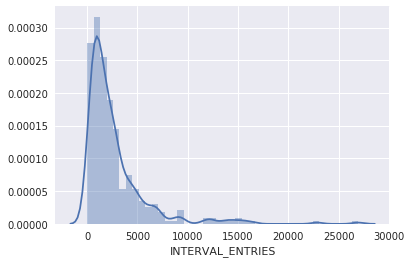

In [95]:
sns.distplot(stations_Interval_Entries_average.INTERVAL_ENTRIES)

/home/amine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


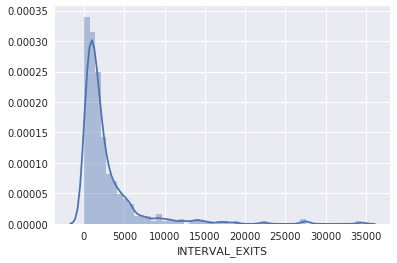

In [96]:
sns.distplot(stations_Interval_Exits_average.INTERVAL_EXITS)

In [97]:
# then get top 10 stations for Entries and Exits
top10_entries_stations = \
    (stations_Interval_Entries_average
                   .sort_values(by='INTERVAL_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_exits_stations = \
    (stations_Interval_Exits_average
                   .sort_values(by='INTERVAL_EXITS',ascending=False) 
                   .STATION.head(10))

In [98]:
top10_entries_stations

59      34 ST-PENN STA
226    GRD CNTRL-42 ST
57     34 ST-HERALD SQ
66     42 ST-PORT AUTH
106              86 ST
44               23 ST
9               125 ST
210      FLUSHING-MAIN
248    JKSN HT-ROOSVLT
111              96 ST
Name: STATION, dtype: object

In [99]:
top10_exits_stations

59      34 ST-PENN STA
57     34 ST-HERALD SQ
226    GRD CNTRL-42 ST
332     TIMES SQ-42 ST
14      14 ST-UNION SQ
106              86 ST
66     42 ST-PORT AUTH
44               23 ST
210      FLUSHING-MAIN
9               125 ST
Name: STATION, dtype: object

In [100]:
# next create a new df that filters the stations data down
# to the top 10 entries stations
top10_entries_stations_df = \
    stations_Interval_Entries_average[stations_Interval_Entries_average['STATION'].isin(top10_entries_stations)]
# to the top 10 exits stations
top10_exits_stations_df = \
    stations_Interval_Exits_average[stations_Interval_Exits_average['STATION'].isin(top10_entries_stations)]

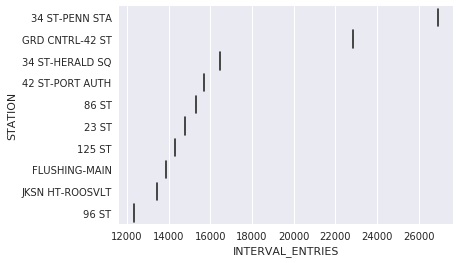

In [101]:
# use seaborn to create a boxplot by station
sns.boxplot('INTERVAL_ENTRIES', 'STATION', data=top10_entries_stations_df)

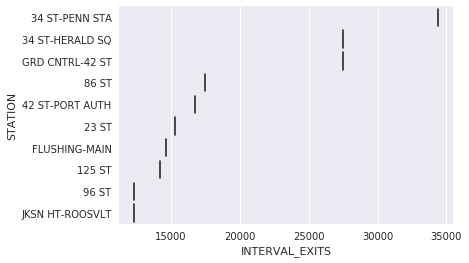

In [102]:
sns.boxplot('INTERVAL_EXITS', 'STATION', data=top10_exits_stations_df)

We have almost the same list of stations

we can filter where the SAT school operates